In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
pip install arch

## VCB Dataset

In [ ]:
# Import data
df = pd.read_csv("VCB.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

### Chia 7:3

In [ ]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [ ]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [ ]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [ ]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')


Iteration:      1,   Func. Count:      5,   Neg. LLF: 41321.98468206369
Iteration:      2,   Func. Count:     12,   Neg. LLF: 14703.691085487455
Iteration:      3,   Func. Count:     16,   Neg. LLF: 14703.690682006494
Iteration:      4,   Func. Count:     20,   Neg. LLF: 14703.689040891864
Iteration:      5,   Func. Count:     24,   Neg. LLF: 14703.686883219227
Iteration:      6,   Func. Count:     27,   Neg. LLF: 14703.68688321989
Optimization terminated successfully    (Exit mode 0)
            Current function value: 14703.686883219227
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.377e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


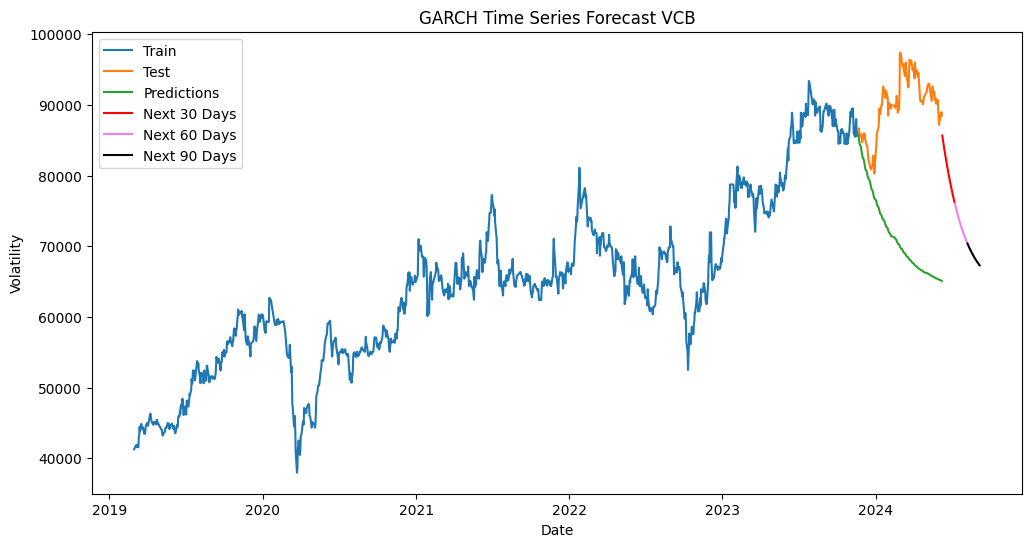

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast VCB')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

# Tính toán độ đo RMSE, MAPE và MAE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MAE:", mae)

RMSE: 20696.065922190715
MAPE: 20.17873698254209 %
MAE: 18530.197186928675


## CTG Dataset

In [ ]:
# Import data
df = pd.read_csv("CTG.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

In [ ]:
print(price)

                   Close
Date                    
2019-03-01  14421.990234
2019-03-04  14699.336914
2019-03-05  14734.004883
2019-03-06  14768.672852
2019-03-07  14907.345703
...                  ...
2024-06-03  32600.000000
2024-06-04  32800.000000
2024-06-05  32400.000000
2024-06-06  32600.000000
2024-06-07  32800.000000

[1317 rows x 1 columns]


### Chia 7:3

In [ ]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [ ]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [ ]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [ ]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 40329.055843866394
Iteration:      2,   Func. Count:     12,   Neg. LLF: 13526.634045337445
Iteration:      3,   Func. Count:     16,   Neg. LLF: 13526.62706723886
Iteration:      4,   Func. Count:     20,   Neg. LLF: 13526.598738961518
Iteration:      5,   Func. Count:     24,   Neg. LLF: 13526.562843802898
Iteration:      6,   Func. Count:     28,   Neg. LLF: 13526.562793438403
Iteration:      7,   Func. Count:     31,   Neg. LLF: 13526.562793439884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13526.562793438403
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.797e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


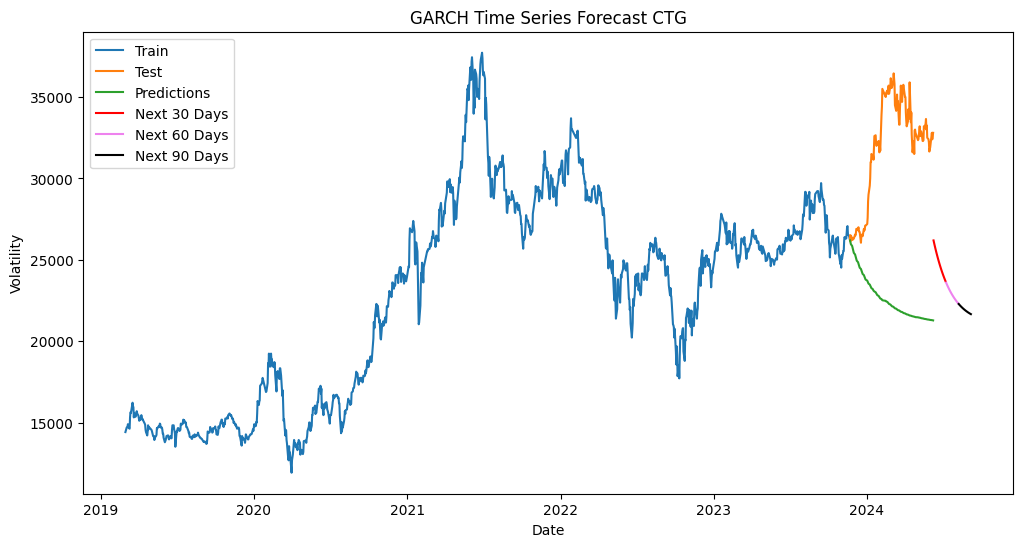

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast CTG')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

# Tính toán độ đo RMSE, MAPE và MAE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MAE:", mae)

RMSE: 10198.213900532992
MAPE: 27.750507796479074 %
MAE: 9213.463608452399


## ACB Dataset

In [ ]:
# Import data
df = pd.read_csv("ACB.VN.csv")
df.dropna(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Sort 'Date' asc
df.sort_values('Date', inplace=True)

#Input biến 'price'
price = pd.DataFrame(df, columns=['Close'])

### Chia 7:3

In [ ]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [ ]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [ ]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [ ]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 39712.500571997574
Iteration:      2,   Func. Count:     11,   Neg. LLF: 12954.981976100265
Iteration:      3,   Func. Count:     15,   Neg. LLF: 12954.967169905969
Iteration:      4,   Func. Count:     19,   Neg. LLF: 12954.908253753267
Iteration:      5,   Func. Count:     23,   Neg. LLF: 12954.843901504868
Iteration:      6,   Func. Count:     27,   Neg. LLF: 12954.843784121149
Iteration:      7,   Func. Count:     30,   Neg. LLF: 12954.843784126277
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12954.843784121149
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.39e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


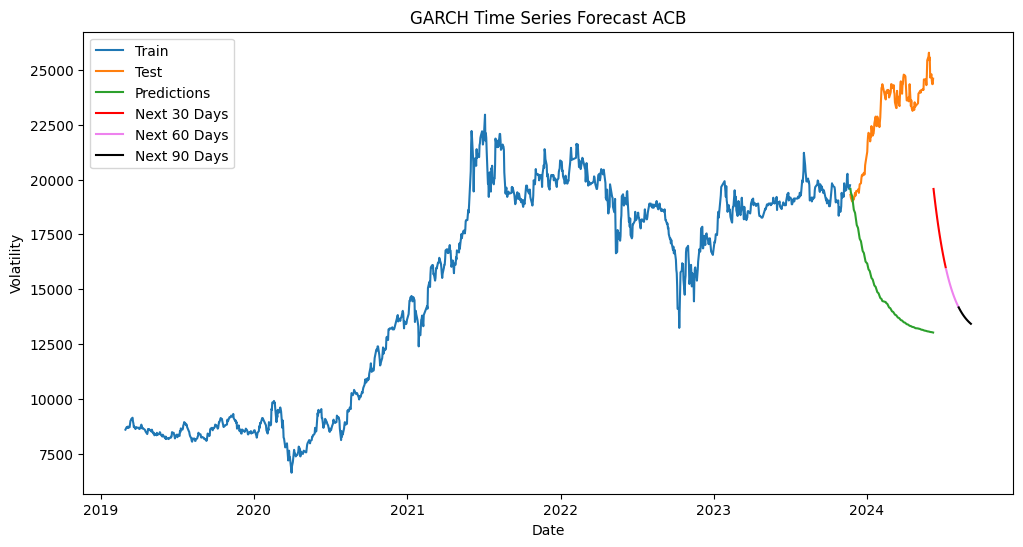

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast ACB')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

# Tính toán độ đo RMSE, MAPE và MAE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MAE:", mae)

RMSE: 8908.21453278024
MAPE: 34.631241384083346 %
MAE: 8170.228118527763
